<a href="https://colab.research.google.com/github/ramonfsk/machineLearning/blob/master/prevQtdTransacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

uri = 'https://raw.githubusercontent.com/ramonfsk/machineLearning/master/transactions.csv'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
dados = pd.read_csv(uri)
dados.columns = ['data', 'total_trsc']
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
dados.dtypes

data          datetime64[ns]
total_trsc             int64
dtype: object

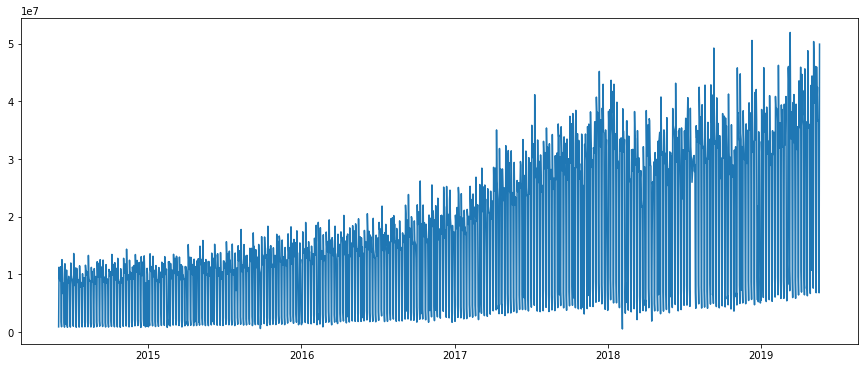

In [84]:
x = dados.data
y = dados.total_trsc

plt.plot(x, y)

In [91]:
dados.describe().round(2)
dados.corr().round(4)

,total_trsc
total_trsc,1.0


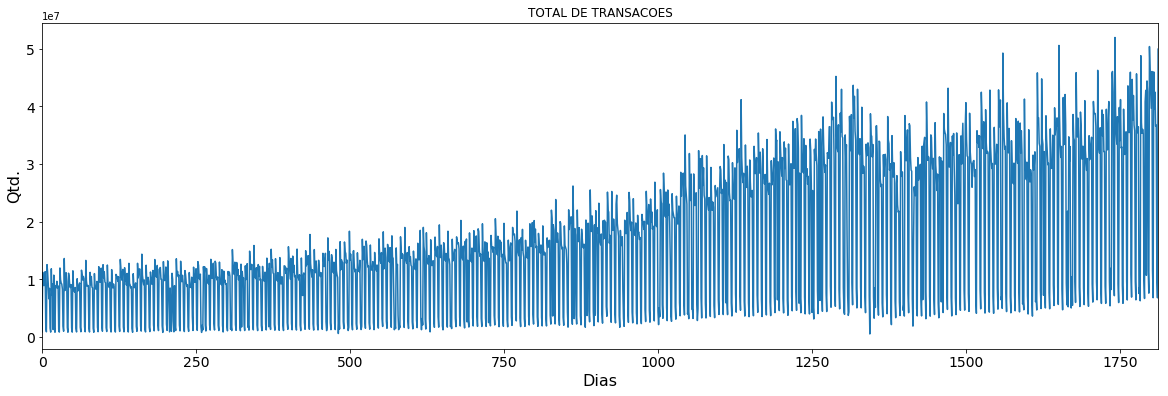

In [95]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('TOTAL DE TRANSACOES')
ax.set_ylabel('Qtd.', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados.total_trsc.plot(fontsize=14)

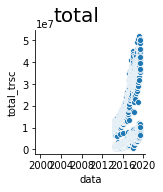

In [112]:
ax = sns.pairplot(dados, y_vars='total_trsc', x_vars='data')
ax.fig.suptitle('total', fontsize=20, y=1.05)
ax

In [118]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados['data']
y = dados['total_trsc']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1359 elementos e testaremos com 454 elementos


ValueError: ignored